# Example of Decision Tree
https://www.datacamp.com/community/tutorials/decision-tree-classification-python

In [10]:
# Load libraries
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import os

# Set Path to Project Data
os.chdir("C:/Users/ShawnsLabtop/Desktop/Datascience/Project")

df1 = pd.read_csv('ALL_2017.csv')
df2 = pd.read_csv('ALL_2017_1.csv')
df3 = pd.read_csv('ALL_2017_2.csv')

dfMerger = pd.read_csv('merger.csv')

# merge all 3 files together
df = pd.concat([df1,df2,df3])

df = df.drop_duplicates()

df['DEPSUMBR'] = df['DEPSUMBR'].str.replace(',', '')
df['DEPSUMBR'] = df['DEPSUMBR'].astype('int64') * 1000

df['ASSET'] = df['ASSET'].str.replace(',', '')
df['ASSET'] = df['ASSET'].astype('int64') * 1000

In [11]:
dfData = df.groupby(['NAMEFULL','STALPHCR','CHARTER', 'SPECDESC','ASSET'])['BRNUM'].count().reset_index().rename(columns={'BRNUM':'NumberOfBranches'})

#print(dfData.head())
Data = pd.merge(dfData,dfMerger,left_on=['NAMEFULL','STALPHCR'],right_on=['NonSurvivingBank','State'], how='left')
Data = Data.replace(np.nan,0)
Data['Acquired'] = np.where( ( (Data['MergerDate'] != 0) ) , 1, 0)

Data = Data.drop_duplicates()

# Remove all the columns from dfMerger
Data.drop('MergerDate', axis=1, inplace=True)   
Data.drop('NonSurvivingBank', axis=1, inplace=True)
Data.drop('State', axis=1, inplace=True)   
Data.drop('MergerType', axis=1, inplace=True)   
Data.drop('Method', axis=1, inplace=True)   
Data.drop('SurvivingBank', axis=1, inplace=True)  
Data.drop('State2', axis=1, inplace=True)             

print(Data.head())

             NAMEFULL STALPHCR CHARTER                SPECDESC      ASSET  \
0           1880 Bank       MD   STATE      COMMERCIAL LENDING  323306000   
1  1st Advantage Bank       MO   STATE      COMMERCIAL LENDING   98601000   
2            1st Bank       MT   STATE            AGRICULTURAL   47614000   
3    1st Bank & Trust       OK   STATE  ALL OTHER < $1 BILLION  141904000   
4       1st Bank Yuma       AZ   STATE      COMMERCIAL LENDING  307302000   

   NumberOfBranches  Acquired  
0                 9         0  
1                 2         0  
2                 2         0  
3                 8         0  
4                10         0  


In [12]:
#split dataset in features and target variable
feature_cols = ['ASSET','NumberOfBranches']
X = Data[feature_cols] # Features
y = Data.Acquired # Target variable

In [13]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [14]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [15]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9102656137832017


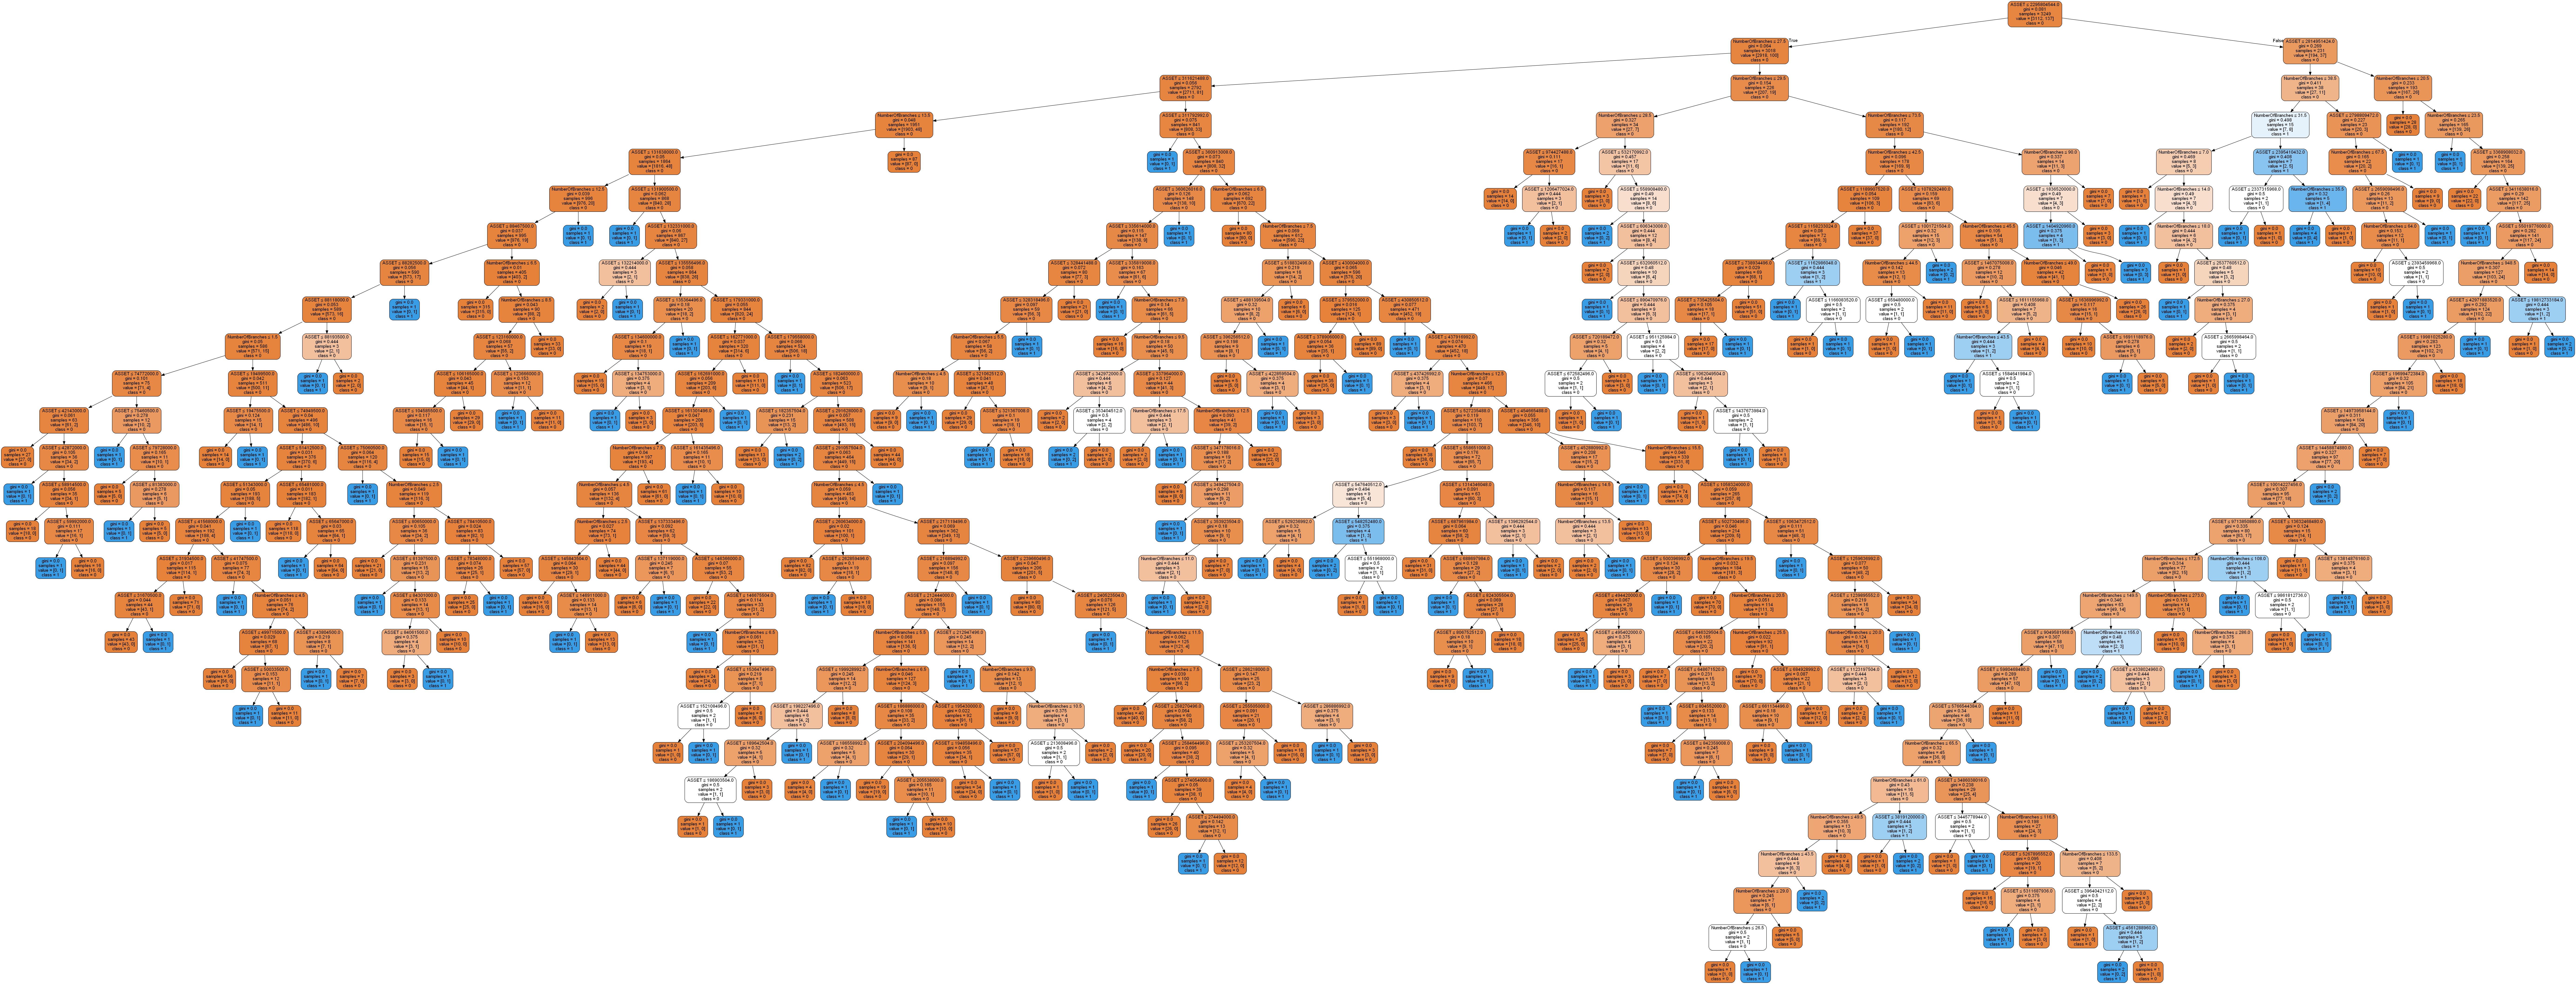

In [16]:
# Set Path to Project Data
os.chdir("C:/Users/ShawnsLabtop")

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('AquiredBanks.png')
Image(graph.create_png())

In [17]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9547738693467337


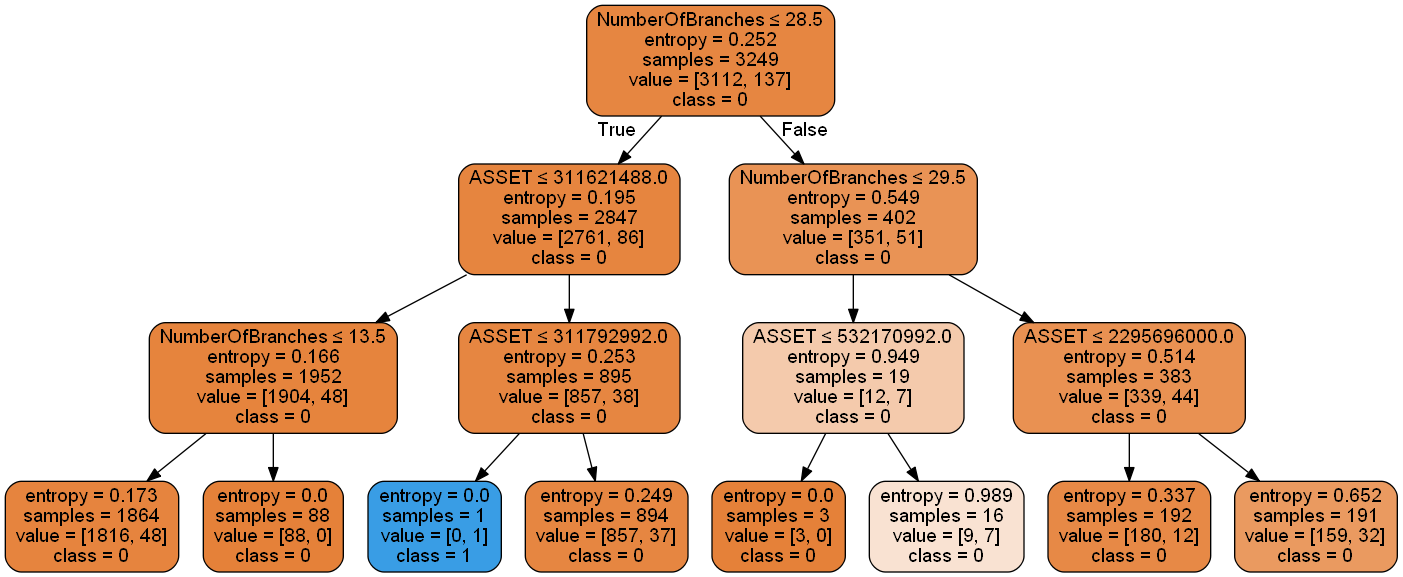

In [18]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('AquiredBank2.png')
Image(graph.create_png())